In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [2]:
import warnings
warnings.simplefilter("ignore")

In [3]:
df = pd.read_csv("train.csv")
df.head()

,Unnamed: 0,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,25629,INN25630,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,14473,INN14474,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,23720,INN23721,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,5843,INN05844,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,18709,INN18710,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [4]:
df.columns

Index(['Unnamed: 0', 'Booking_ID', 'no_of_adults', 'no_of_children',
       'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan',
       'required_car_parking_space', 'room_type_reserved', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'market_segment_type',
       'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests', 'booking_status'],
      dtype='object')

In [5]:
df.drop(columns = ["Unnamed: 0", "Booking_ID"], inplace= True)

In [6]:
df.shape

(29020, 18)

In [7]:
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(7661)

In [9]:
df.drop_duplicates(inplace= True)

In [10]:
df.shape

(21359, 18)

In [11]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [14]:
df["booking_status"].value_counts()

booking_status
Not_Canceled    15231
Canceled         6128
Name: count, dtype: int64

#### Data is imbalanced


In [17]:
cat_cols = ['type_of_meal_plan', 'required_car_parking_space','room_type_reserved', 'market_segment_type', 'repeated_guest', 'booking_status']

num_cols = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests']

#### Data Analysis

##### Univariate analysis

In [24]:
def num_plot_dist(df: pd.DataFrame, num_features: list):
    """Distribution plots for numerical columns

    Args:
        df (pd.DataFrame): dataframe
        num_features (list): list of all numerical columns
    """
    fig, axes = plt.subplots(len(num_features), 2, figsize = (15, len(num_features)*5))
    if len(num_features) == 1:
        axes = [axes]

    for i, column in enumerate(num_features):
        sns.histplot(data = df, x = column, ax = axes[i][0], kde = True, palette= "Blues")
        axes[i][0].set_title(f"Histogram for {column}")

        sns.boxplot(data= df, x = column, ax = axes[i][1], palette= "Blues")
        axes[i][1].set_title(f"Box Plot for {column}")

    plt.tight_layout()
    plt.show()

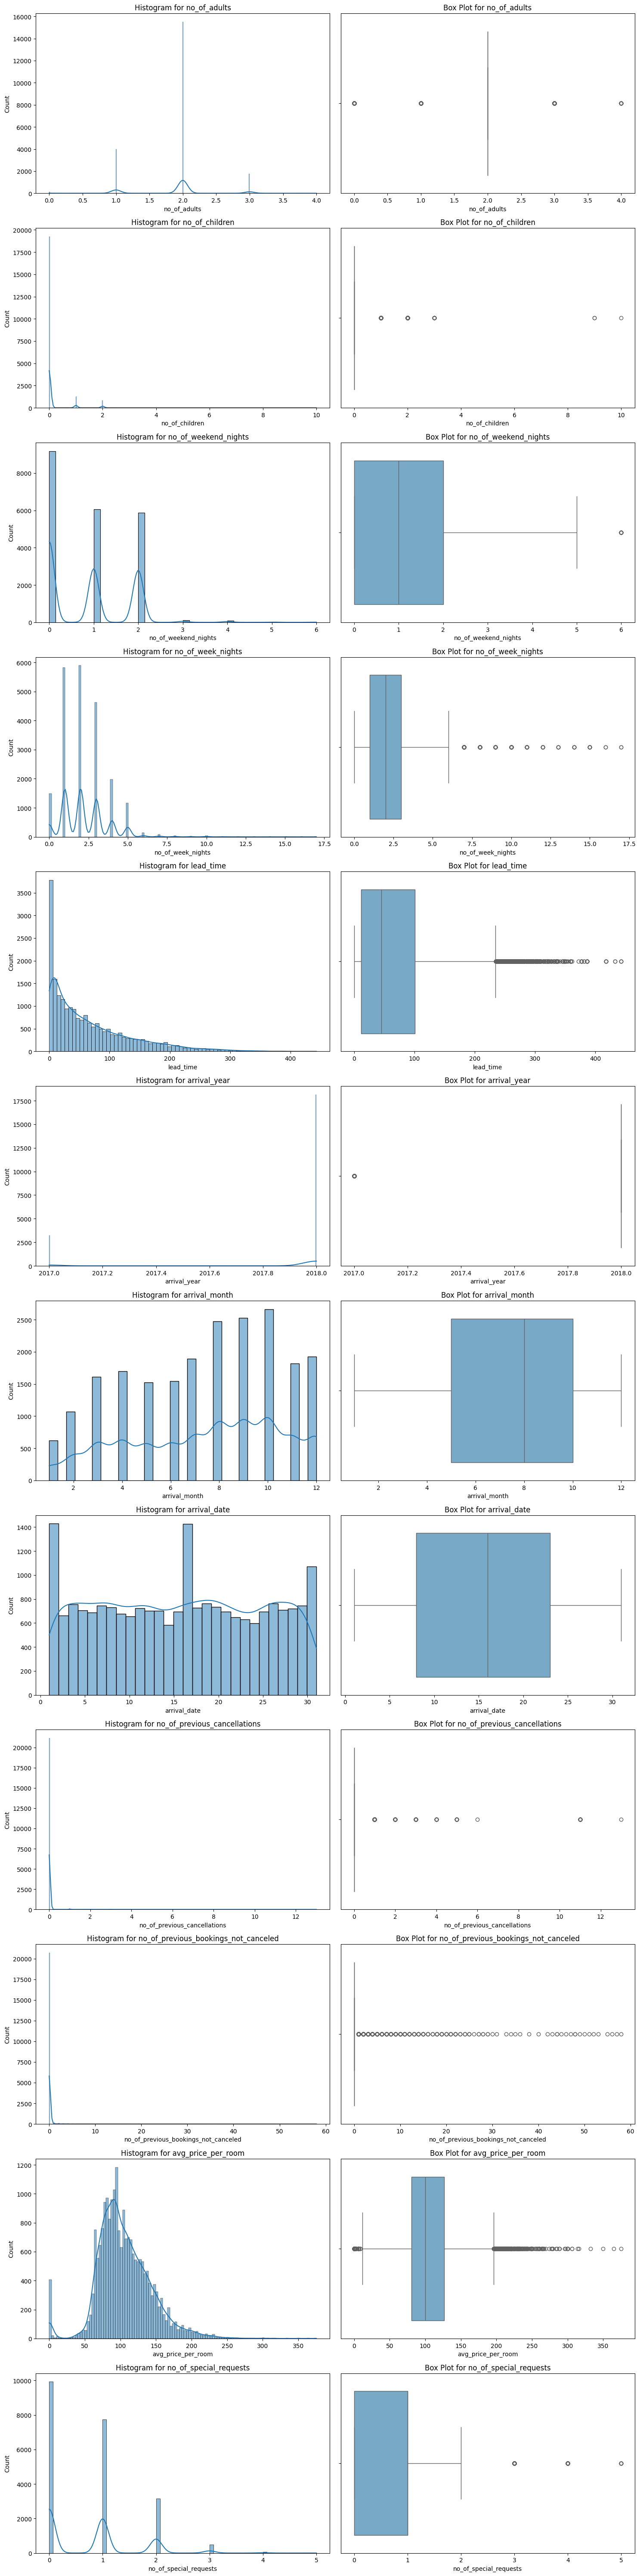

In [25]:
num_plot_dist(df = df, num_features= num_cols)

Categorical Columns

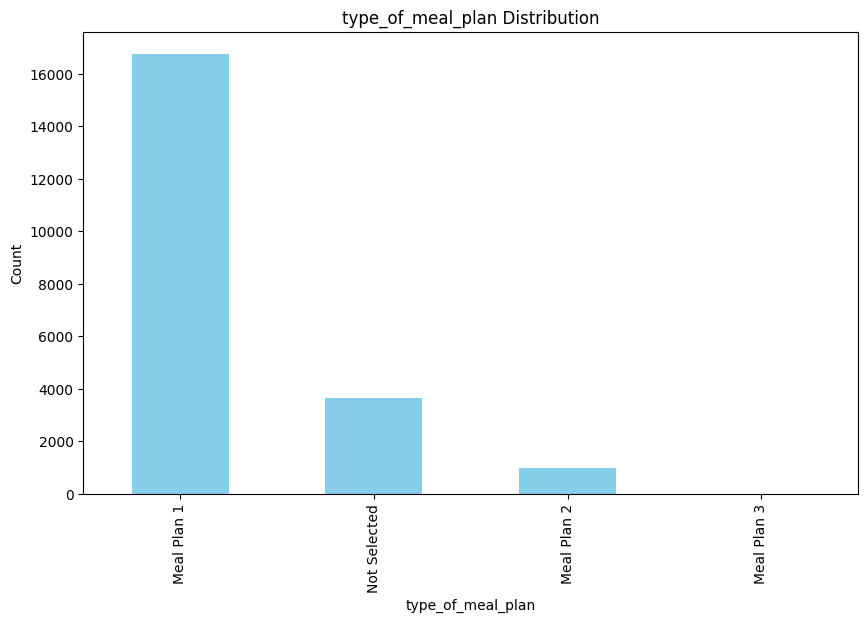

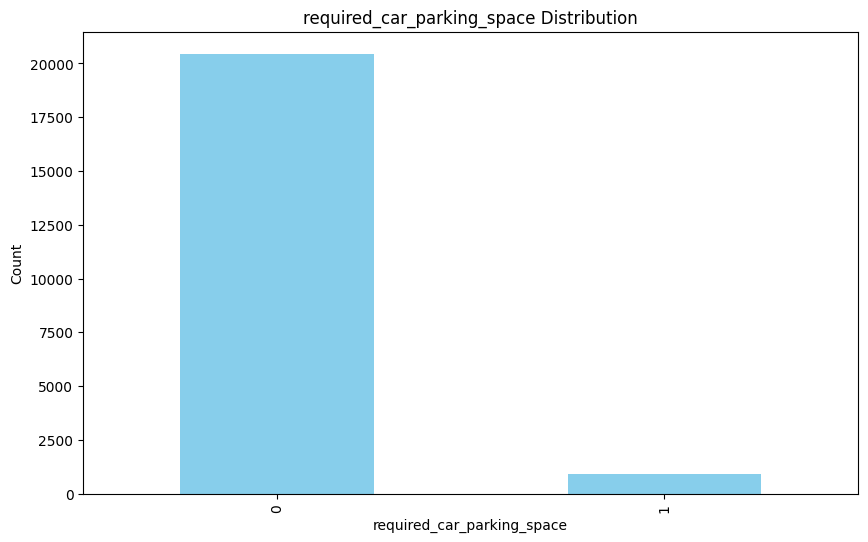

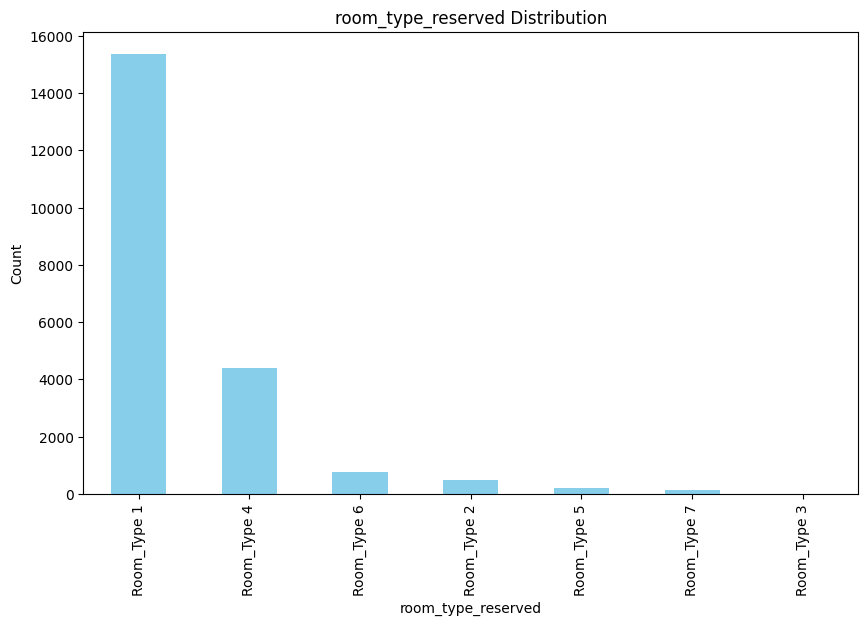

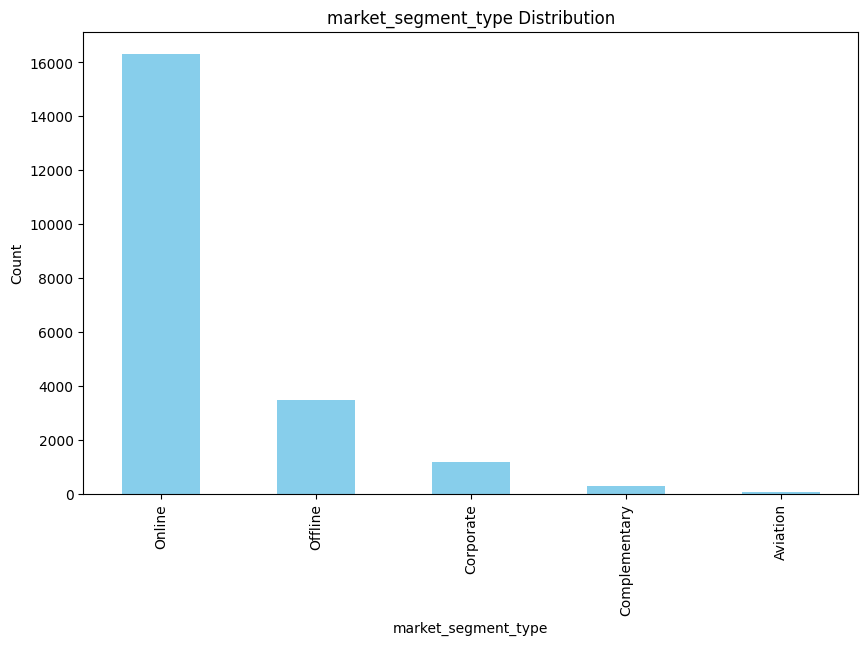

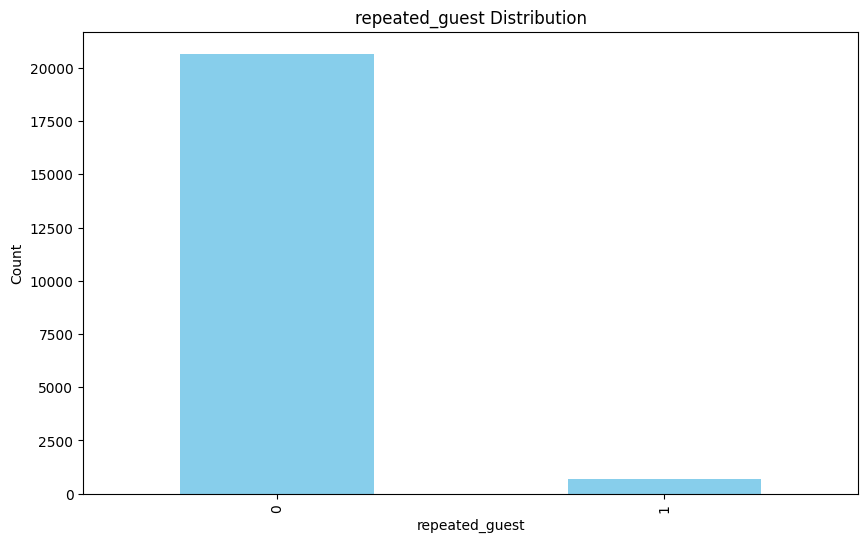

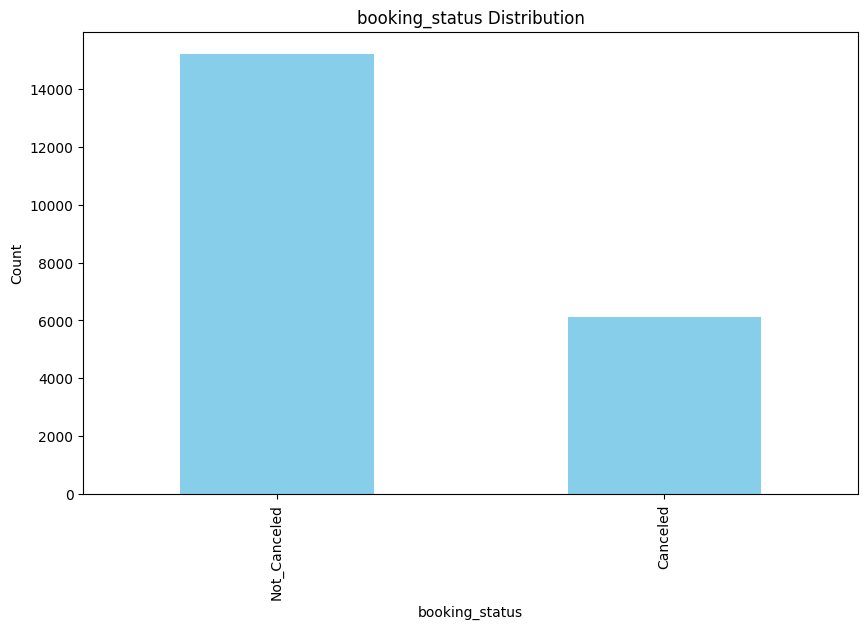

In [26]:
for cat_feature in cat_cols:
    plt.figure(figsize = (10, 6))
    df[cat_feature].value_counts().plot(kind = 'bar', color = 'skyblue')
    plt.title(f"{cat_feature} Distribution")
    plt.xlabel(cat_feature)
    plt.ylabel("Count")
    plt.show()

##### Bivariate Analysis

In [ ]:
def plot_bivariate_num(df: pd.DataFrame, target: str, num_features: list):
    """bivariate plot for numerical columns

    Args:
        df (pd.DataFrame): dataframe
        target (str): target column
        num_features (list): list of numerical columns
    """
    num_plots = len(num_features)
    num_rows = (num_plots + 1) // 2

    fig, axes = plt.subplots(num_rows, 2, figsize = (15, num_rows * 5))
    axes = axes.flatten()

    for i, column in enumerate(num_features):
        sns.boxplot(x = target, y = column, ax = axes[i], data = df, palette= "Blues")
        axes[i].set_title(f"{column} VS {target}")


    plt.tight_layout()
    plt.show()

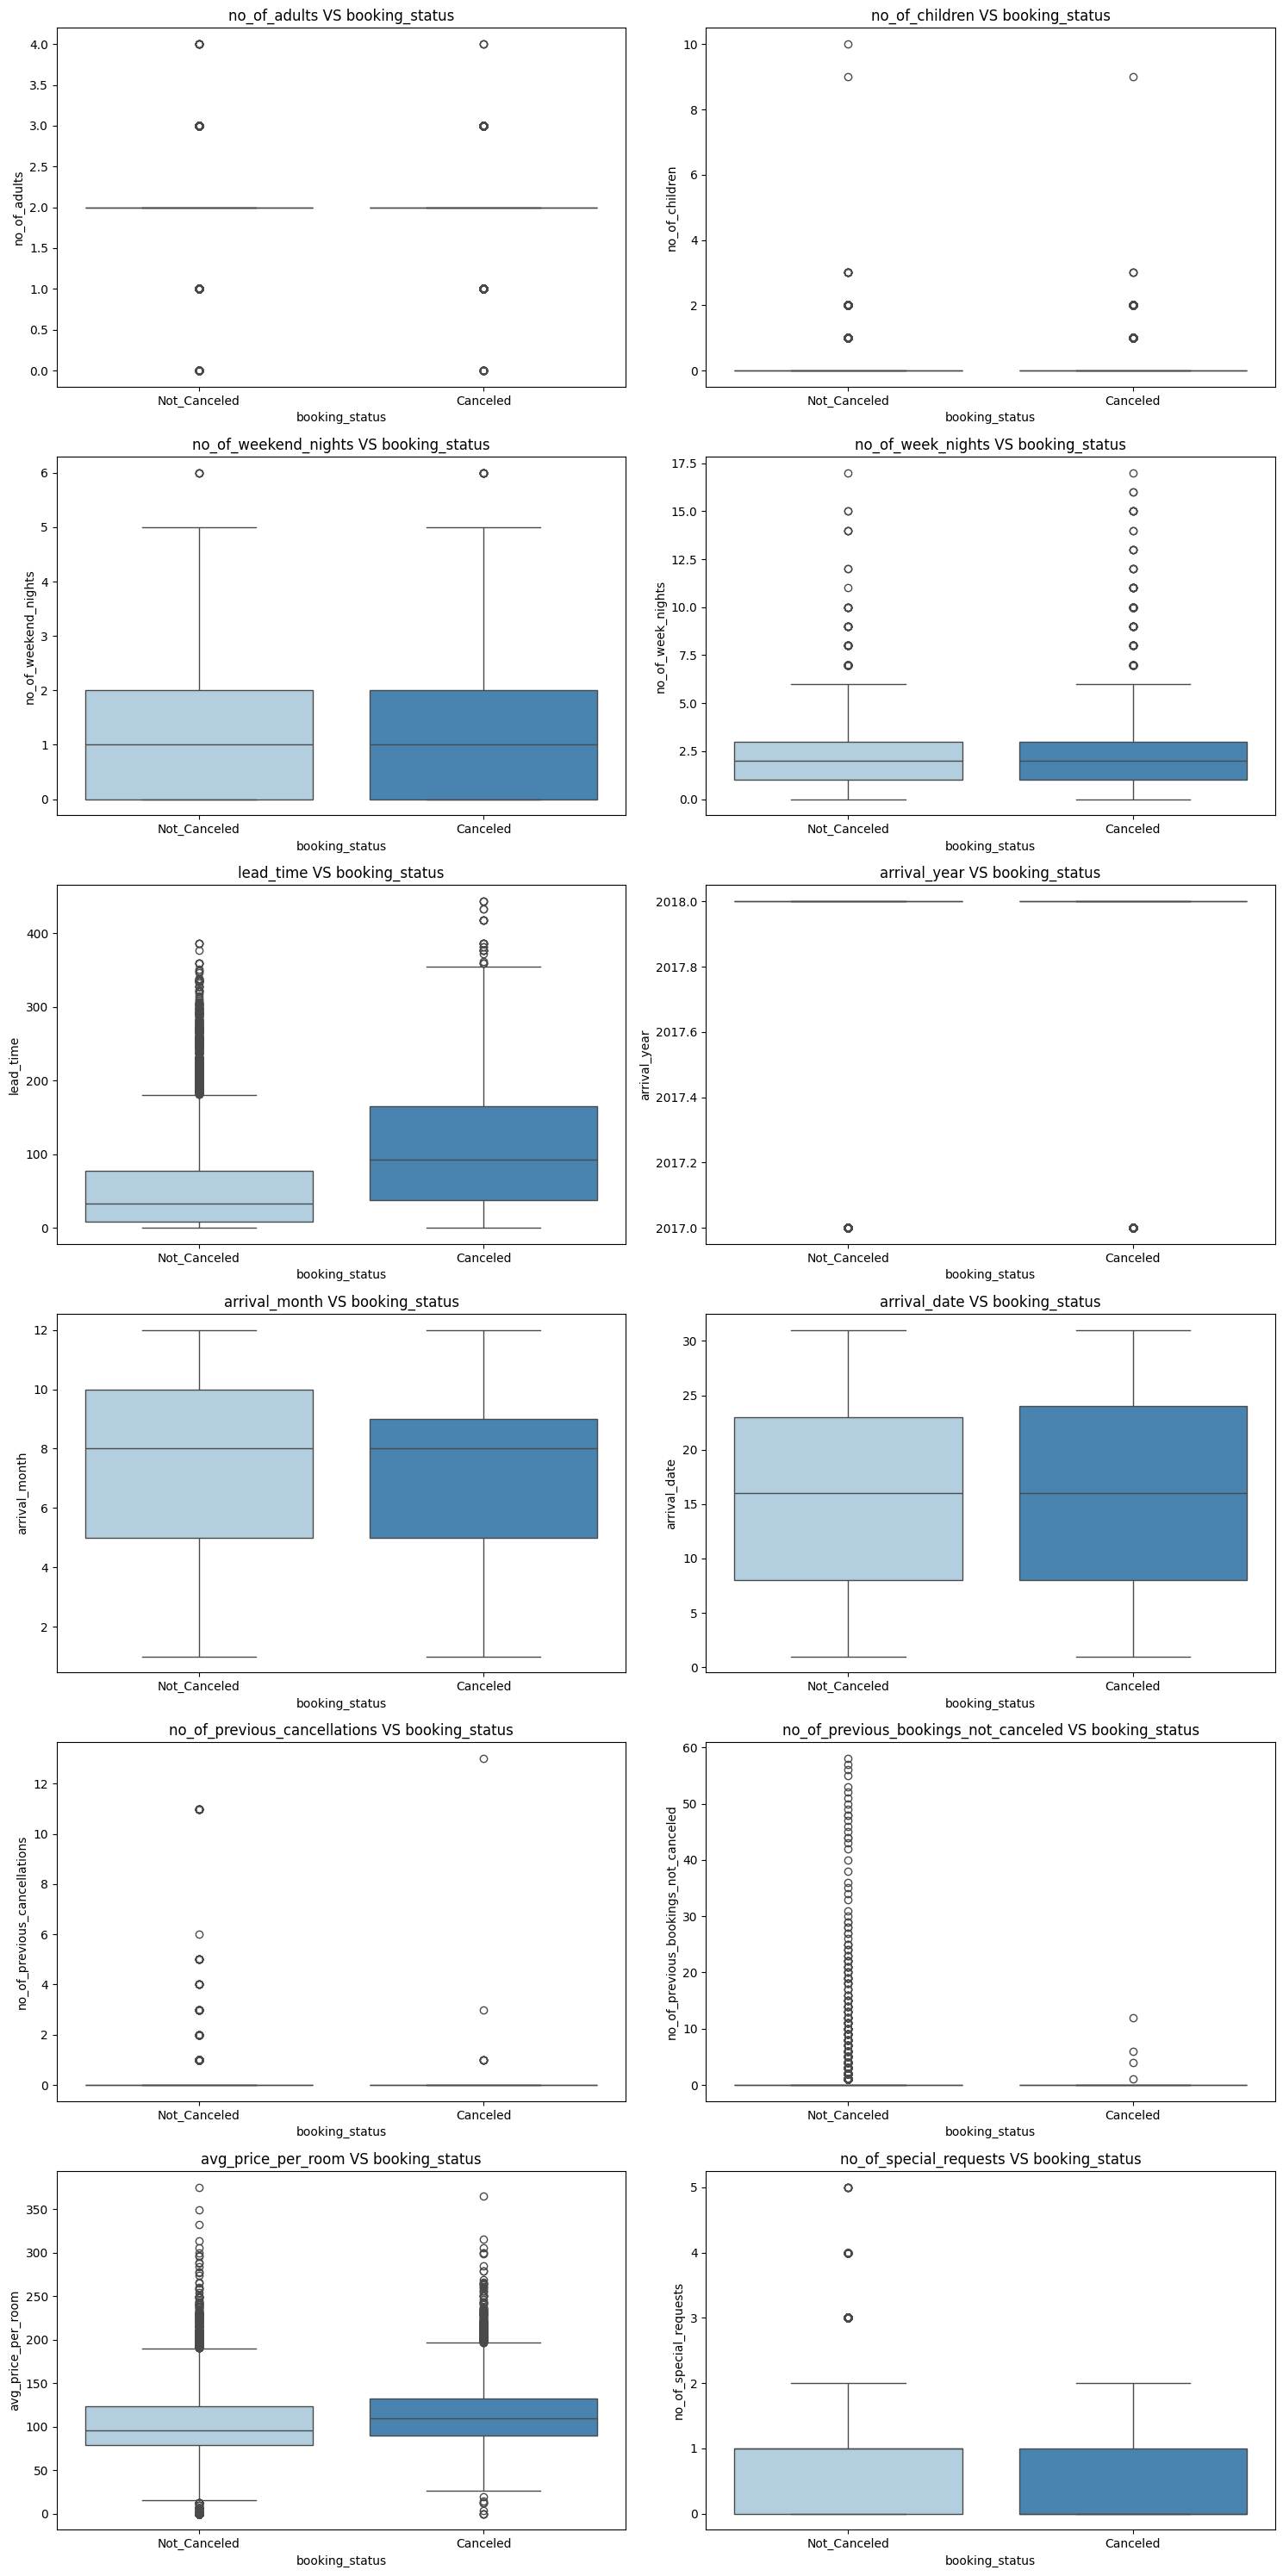

In [32]:
plot_bivariate_num(df = df, target= "booking_status", num_features= num_cols)

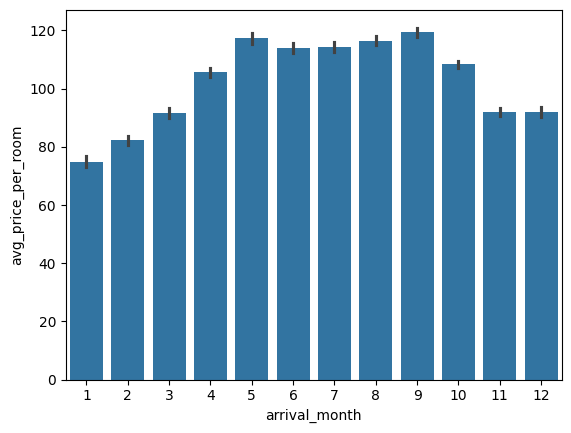

In [35]:
sns.barplot(x = "arrival_month", y = "avg_price_per_room", data= df)
plt.show()

In [ ]:
def plot_bivariate_cat(df: pd.DataFrame, target: str, cat_features: list):
    """Bivariate plots for categorical columns

    Args:
        df (pd.DataFrame): dataframe
        target (str): target column
        cat_features (list): list of categorical columns
    """

    num_features = len(cat_features)
    num_rows = (num_features + 1) // 2

    fig, axes = plt.subplots(num_rows, 2, figsize = (15, num_rows * 5))
    axes = axes.flatten()

    for i, column in enumerate(cat_features):
        sns.countplot( x = column, hue= target, ax = axes[i], data = df, palette= "Set2")
        axes[i].set_title(f"{column} VS {target}")
        axes[i].tick_params(axis = 'x', rotation = 90)


    plt.tight_layout()
    plt.show()

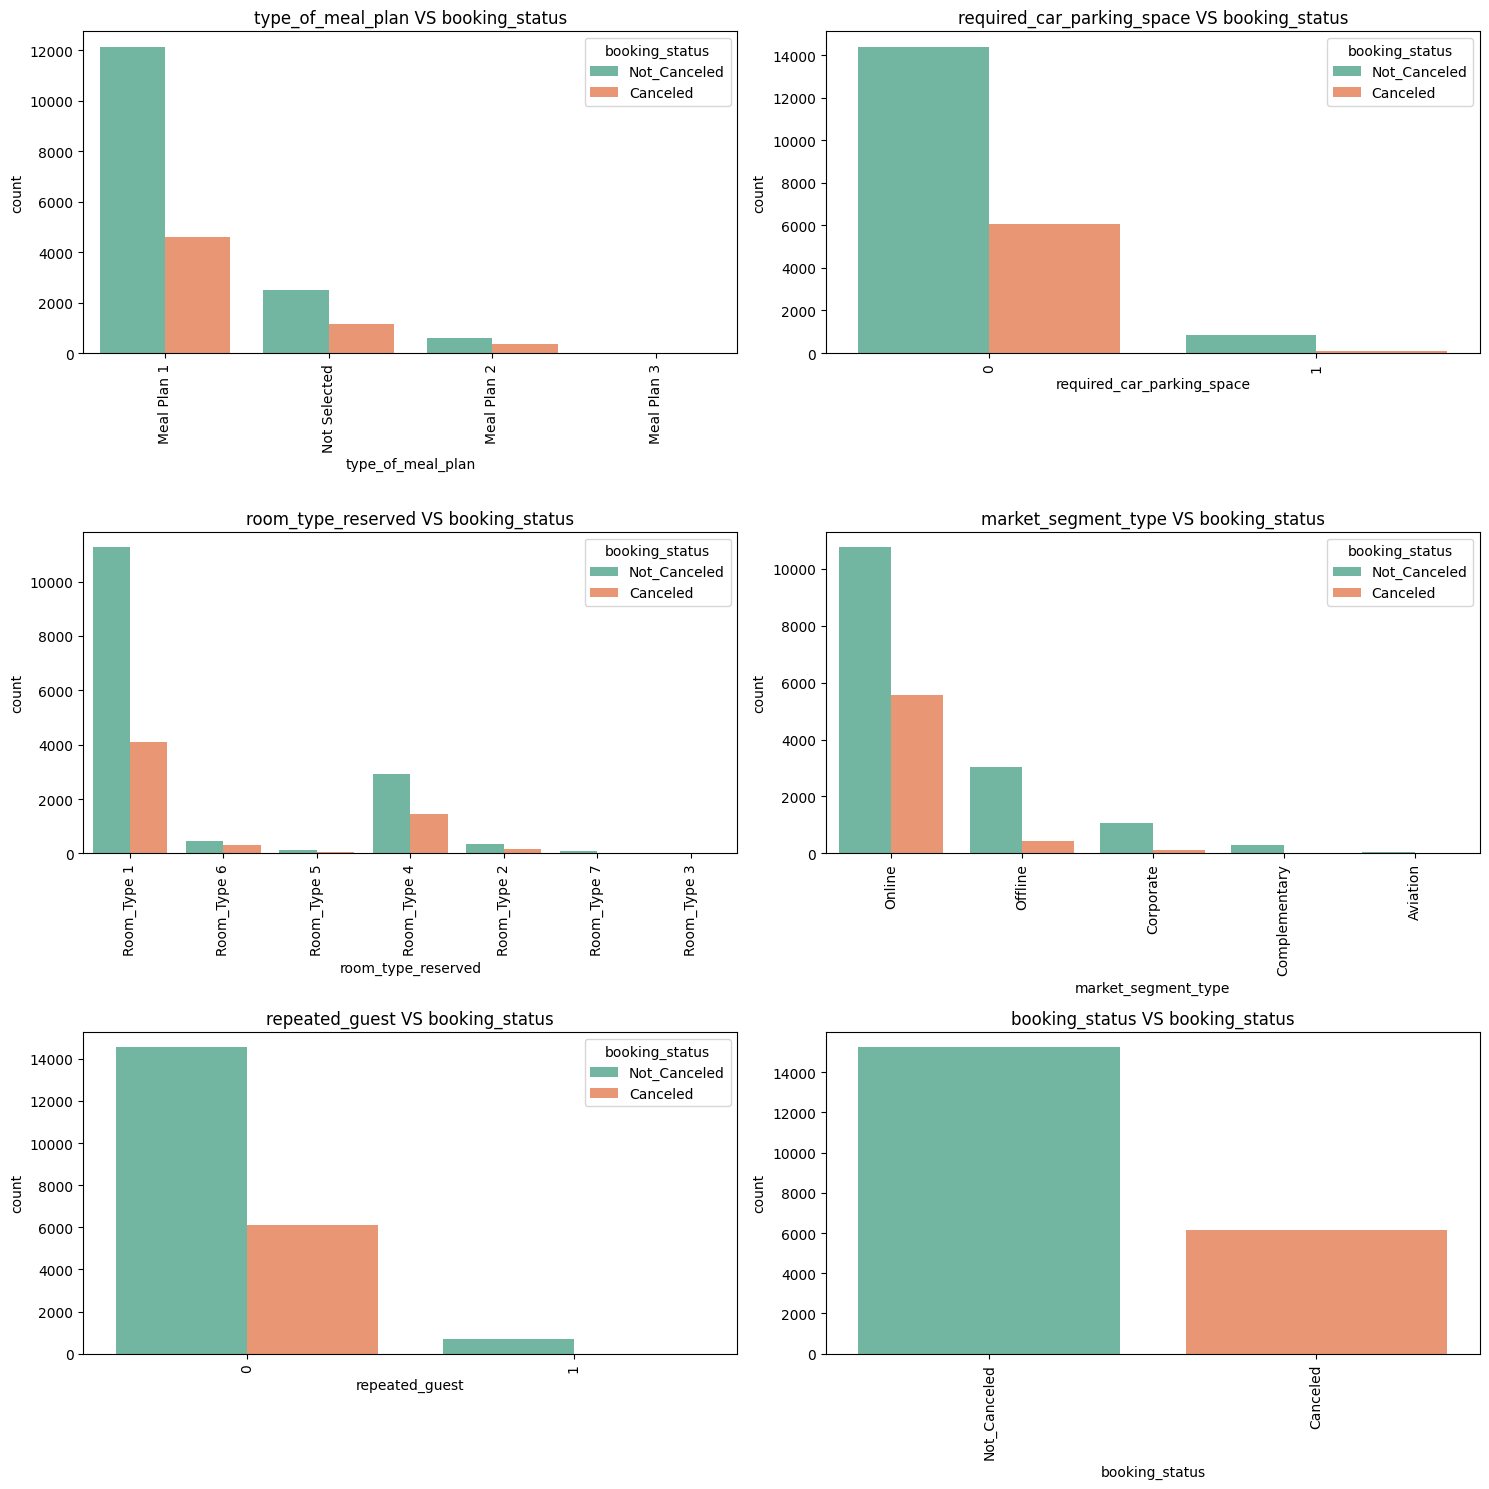

In [37]:
plot_bivariate_cat(df = df, target= "booking_status", cat_features= cat_cols)

#### Data Processing

In [38]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21359 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21359 non-null  int64  
 1   no_of_children                        21359 non-null  int64  
 2   no_of_weekend_nights                  21359 non-null  int64  
 3   no_of_week_nights                     21359 non-null  int64  
 4   type_of_meal_plan                     21359 non-null  object 
 5   required_car_parking_space            21359 non-null  int64  
 6   room_type_reserved                    21359 non-null  object 
 7   lead_time                             21359 non-null  int64  
 8   arrival_year                          21359 non-null  int64  
 9   arrival_month                         21359 non-null  int64  
 10  arrival_date                          21359 non-null  int64  
 11  market_segment_type 

<p> We have to do encoding because we cant pass object type column 

In [40]:
## Label Encoding
from sklearn.preprocessing import LabelEncoder

In [42]:
label_encoder = LabelEncoder()

mappings = {}
for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])
    mappings[col] = {label: code for label, code in zip (label_encoder.classes_, label_encoder.transform(label_encoder.classes_))}

In [44]:
mappings

{'type_of_meal_plan': {'Meal Plan 1': np.int64(0),
  'Meal Plan 2': np.int64(1),
  'Meal Plan 3': np.int64(2),
  'Not Selected': np.int64(3)},
 'required_car_parking_space': {np.int64(0): np.int64(0),
  np.int64(1): np.int64(1)},
 'room_type_reserved': {'Room_Type 1': np.int64(0),
  'Room_Type 2': np.int64(1),
  'Room_Type 3': np.int64(2),
  'Room_Type 4': np.int64(3),
  'Room_Type 5': np.int64(4),
  'Room_Type 6': np.int64(5),
  'Room_Type 7': np.int64(6)},
 'market_segment_type': {'Aviation': np.int64(0),
  'Complementary': np.int64(1),
  'Corporate': np.int64(2),
  'Offline': np.int64(3),
  'Online': np.int64(4)},
 'repeated_guest': {np.int64(0): np.int64(0), np.int64(1): np.int64(1)},
 'booking_status': {'Canceled': np.int64(0), 'Not_Canceled': np.int64(1)}}

In [45]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,0,0,0,26,2017,10,17,4,0,0,0,161.00,0,1
1,2,1,1,1,0,0,0,98,2018,7,16,4,0,0,0,121.50,2,1
2,2,0,0,3,0,0,0,433,2018,9,8,3,0,0,0,70.00,0,0
3,2,0,2,5,0,0,0,195,2018,8,8,3,0,0,0,72.25,0,1
4,1,0,0,2,0,0,0,188,2018,6,15,3,0,0,0,130.00,0,0


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21359 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21359 non-null  int64  
 1   no_of_children                        21359 non-null  int64  
 2   no_of_weekend_nights                  21359 non-null  int64  
 3   no_of_week_nights                     21359 non-null  int64  
 4   type_of_meal_plan                     21359 non-null  int64  
 5   required_car_parking_space            21359 non-null  int64  
 6   room_type_reserved                    21359 non-null  int64  
 7   lead_time                             21359 non-null  int64  
 8   arrival_year                          21359 non-null  int64  
 9   arrival_month                         21359 non-null  int64  
 10  arrival_date                          21359 non-null  int64  
 11  market_segment_type 

<p> Check multicollinearity

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [53]:
X = add_constant(df)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [54]:
vif_data

,feature,VIF
0,const,4.100197e+07
1,no_of_adults,1.341180e+00
2,no_of_children,1.282459e+00
3,no_of_weekend_nights,1.073215e+00
4,no_of_week_nights,1.125260e+00
5,type_of_meal_plan,1.178228e+00
6,required_car_parking_space,1.036105e+00
7,room_type_reserved,1.549859e+00
8,lead_time,1.406287e+00
9,arrival_year,1.288533e+00


<p> if VIF is above 5 we would say multicollinearity but in this data its not

In [55]:
corr = df.corr()

<Axes: >

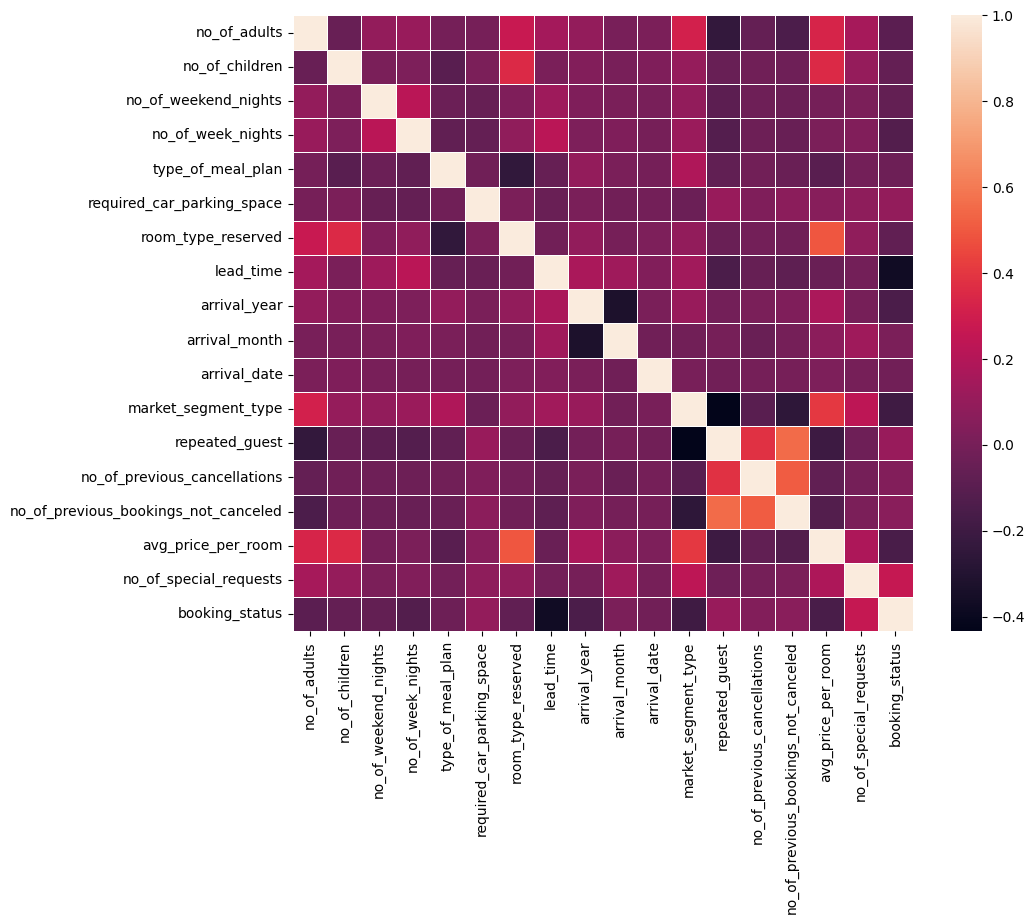

In [56]:
plt.figure(figsize = (10,8))
sns.heatmap(corr, linewidths= 0.5)

<p> Skewness

In [60]:
skewness = df.skew()

In [61]:
skewness

no_of_adults                            -0.305652
no_of_children                           4.165696
no_of_weekend_nights                     0.636637
no_of_week_nights                        1.553657
type_of_meal_plan                        1.650716
required_car_parking_space               4.538315
room_type_reserved                       1.392145
lead_time                                1.405258
arrival_year                            -1.953273
arrival_month                           -0.293266
arrival_date                             0.010333
market_segment_type                     -2.333046
repeated_guest                           5.282330
no_of_previous_cancellations            13.270580
no_of_previous_bookings_not_canceled     7.619850
avg_price_per_room                       0.542888
no_of_special_requests                   0.922373
booking_status                          -0.942305
dtype: float64

<p> few columns are highly skew like "no_of_previous_cancellations" , "no_of_previous_bookings_not_canceled" and some are skew but not that much  like "no_of_children"
<p> So to fix that we can apply transformation for this case we will apply log transformation

In [59]:
for col in df.columns:
    if skewness[col] > 5:
        df[col] = np.log1p(df[col])

#### Our data is highly imbalanced

In [62]:
df["booking_status"].value_counts()

booking_status
1    15231
0     6128
Name: count, dtype: int64

In [63]:
# oversampling

X= df.drop(columns= "booking_status")
y = df["booking_status"]

In [64]:
X.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')

In [65]:
from imblearn.over_sampling import SMOTE

In [66]:
smote = SMOTE(random_state= 42)
X_res, y_res = smote.fit_resample(X, y)

In [67]:
y_res.value_counts()

booking_status
1    15231
0    15231
Name: count, dtype: int64

In [68]:
balanced_df = pd.DataFrame(X_res, columns = X.columns)
balanced_df["booking_status"] = y_res

In [69]:
balanced_df.shape

(30462, 18)

In [70]:
balanced_df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,0,0,0,26,2017,10,17,4,0.0,0.0,0.0,161.00,0,1
1,2,1,1,1,0,0,0,98,2018,7,16,4,0.0,0.0,0.0,121.50,2,1
2,2,0,0,3,0,0,0,433,2018,9,8,3,0.0,0.0,0.0,70.00,0,0
3,2,0,2,5,0,0,0,195,2018,8,8,3,0.0,0.0,0.0,72.25,0,1
4,1,0,0,2,0,0,0,188,2018,6,15,3,0.0,0.0,0.0,130.00,0,0


In [71]:
df = balanced_df.copy()

In [72]:
df.shape

(30462, 18)

#### Feature Selection

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
X = df.drop(columns= ["booking_status"])
y = df["booking_status"]

In [75]:
model = RandomForestClassifier(random_state= 42)
model.fit(X, y)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [76]:
feature_importance = model.feature_importances_

In [78]:
feature_importance_df = pd.DataFrame({
    "features" :  X.columns,
    "importance": feature_importance
})

In [81]:
top_features_importance_df = feature_importance_df.sort_values(by = "importance", ascending= False)

In [84]:
top_10_features = top_features_importance_df["features"].head(10).values
top_10_df = df[top_10_features.tolist() + ["booking_status"]]

In [85]:
len(top_10_df.columns)

11

In [86]:
df = top_10_df.copy()

#### Model selection

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [88]:
X = df.drop(columns= ["booking_status"])
y = df["booking_status"]

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [90]:
classifiers = {
    "RandomForest": RandomForestClassifier(random_state= 42),
    "GradientBoosting": GradientBoostingClassifier(random_state= 42),
    "AdaBoost": AdaBoostClassifier(random_state= 42),
    "LogisticRegression": LogisticRegression(random_state= 42),
    "SVC": SVC(random_state= 42),
    "DecisionTree": DecisionTreeClassifier(random_state= 42),
    "GaussianNB": GaussianNB(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(random_state = 42),
    "LightGradientBoosting": LGBMClassifier(random_state= 42)
}

In [ ]:
metrics = {
    "Models": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Socre": []
}

In [94]:
for model_name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_preds = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_preds)
    precision = precision_score(y_test, y_preds)
    recall = recall_score(y_test, y_preds)
    f1 = f1_score(y_test, y_preds)

    metrics["Models"].append(model_name)
    metrics["Accuracy"].append(accuracy)
    metrics["Precision"].append(precision)
    metrics["Recall"].append(recall)
    metrics["F1-Socre"].append(f1)

In [95]:
metrics_df = pd.DataFrame(metrics)

In [96]:
metrics_df

,Models,Accuracy,Precision,Recall,F1-Socre
0,RandomForest,0.893484,0.893659,0.895114,0.894386
1,GradientBoosting,0.835549,0.819333,0.864169,0.841154
2,AdaBoost,0.804530,0.801025,0.814332,0.807624
3,LogisticRegression,0.777614,0.802683,0.740717,0.770456
4,SVC,0.720335,0.729657,0.706840,0.718068
5,DecisionTree,0.841950,0.851050,0.831922,0.841377
6,GaussianNB,0.772526,0.802660,0.727362,0.763158
7,KNeighborsClassifier,0.779911,0.857675,0.675244,0.755604
8,XGBoost,0.871820,0.869074,0.877850,0.873440
9,LightGradientBoosting,0.862957,0.849546,0.884691,0.866762


In [97]:
### train our model

In [98]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [99]:
X = df.drop(columns= ["booking_status"])
y = df["booking_status"]

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [101]:
rf = RandomForestClassifier(random_state= 42)

In [105]:
params_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(10, 50),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'bootstrap': [True, False]
}

In [106]:
random_search = RandomizedSearchCV(
    estimator= rf,
    param_distributions= params_dist,
    n_iter= 5,
    cv= 5,
    verbose= True,
    random_state= 42,
    scoring= 'accuracy'
)

In [107]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


,estimator,RandomForestC...ndom_state=42)
,param_distributions,"{'bootstrap': [True, False], 'max_depth': <scipy.stats....001705FF43CE0>, 'min_samples_leaf': <scipy.stats....001705FF43D40>, 'min_samples_split': <scipy.stats....001705FF43110>, ...}"
,n_iter,5
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [108]:
random_search.best_params_

{'bootstrap': False,
 'max_depth': 33,
 'min_samples_leaf': 3,
 'min_samples_split': 7,
 'n_estimators': 408}

In [109]:
best_rf_model = random_search.best_estimator_

In [110]:
y_pred = best_rf_model.predict(X_test)

In [111]:
accuracy = accuracy_score(y_test, y_preds)
precision = precision_score(y_test, y_preds)
recall = recall_score(y_test, y_preds)
f1 = f1_score(y_test, y_preds)

In [112]:
accuracy, precision, recall, f1

(0.8629574922041687,
 0.8495464497966844,
 0.8846905537459283,
 0.8667624062549865)

In [113]:
### Save the model
import joblib

In [114]:
joblib.dump(best_rf_model, "random_forest.pkl")

['random_forest.pkl']

In [115]:
loaded_model = joblib.load("random_forest.pkl")

In [116]:
X_train[0:1]

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,room_type_reserved
4157,190,1,93.5,9,8,4,5,2,0,0


In [122]:
new_data = np.array([190,1,93.5,9,8,4,5,2,0,0]).reshape(1, -1)

In [123]:
loaded_model.predict(new_data)

array([1])

<p> Size of Random forest model is too big